In [423]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [424]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [425]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


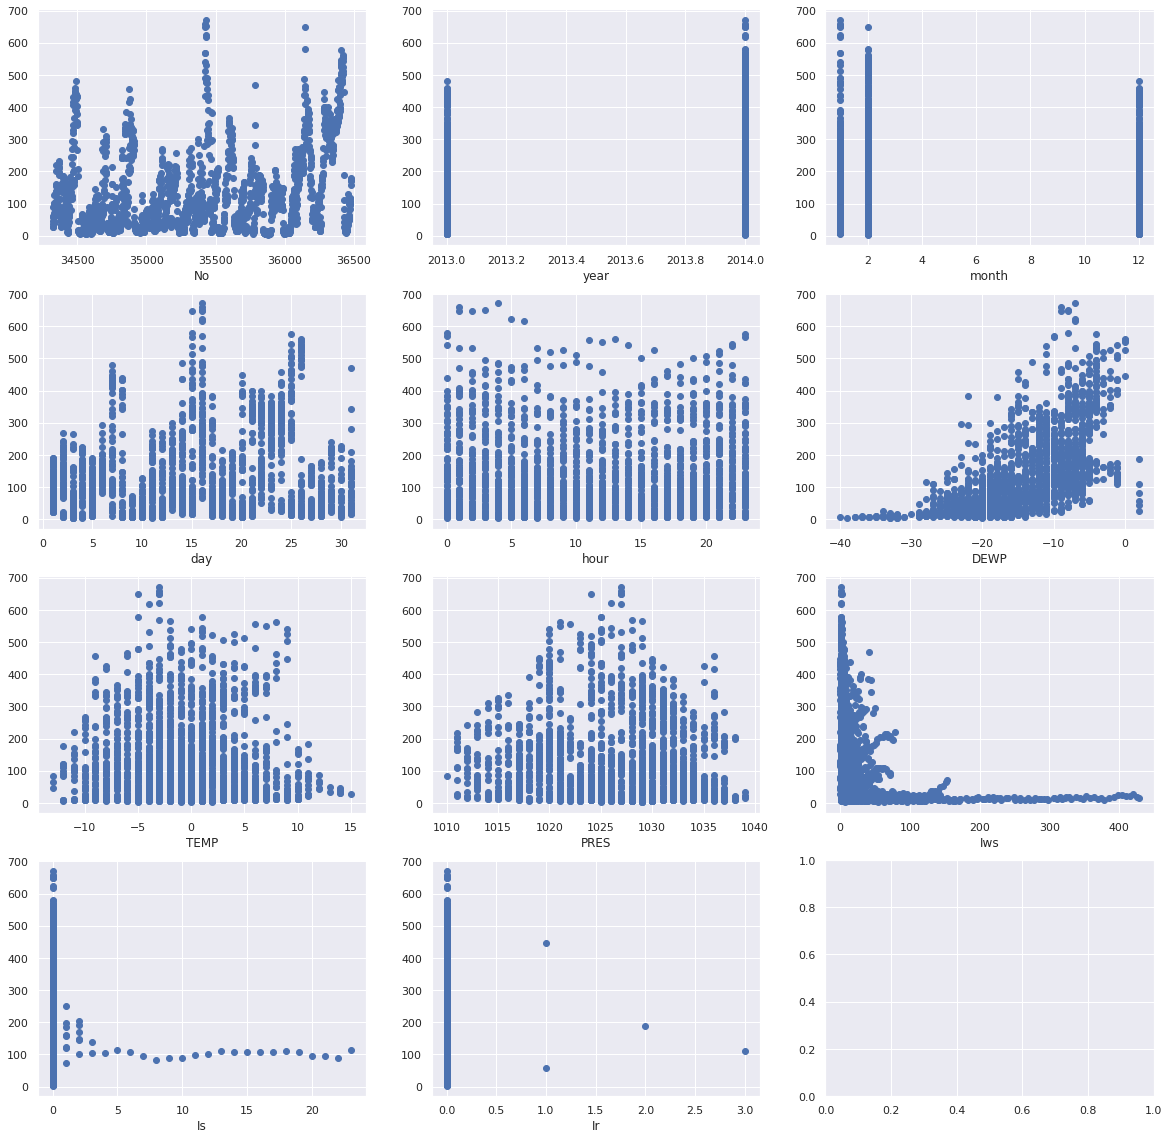

In [426]:
# Plot pairwise join distributions related to pm2.5
X_vars = ['No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

_, subplot_arr = plt.subplots(4, 3, figsize=(20, 20))
for idx, x_var in enumerate(X_vars):
  x_idx = idx // 3
  y_idx = idx % 3
  subplot_arr[x_idx, y_idx].scatter(X[x_var], y)
  subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

# Preprocessing

In [427]:
# Select Features
# Note that you must drop 'Is', since it cause variant prediction for linear regression
X = X[['year', 'month', 'day', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Ir']].values

# Split Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

#Training data points: 1917
#Testing data points: 213


# Linear Regression(Polynomial)

In [428]:
# Create Polynomial Features
poly_degree = 5
quadratic = PolynomialFeatures(degree=poly_degree)
X_train_quad = quadratic.fit_transform(X_train)
X_test_quad = quadratic.fit_transform(X_test)
print(f'Original Dataset dimensions: {X_train.shape}')
print(f'Convert to Polynomial Features: {X_train_quad.shape}')

Original Dataset dimensions: (1917, 8)
Convert to Polynomial Features: (1917, 1287)


In [429]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_quad, y_train)
y_train_pred = lin_reg.predict(X_train_quad)
y_test_pred = lin_reg.predict(X_test_quad)

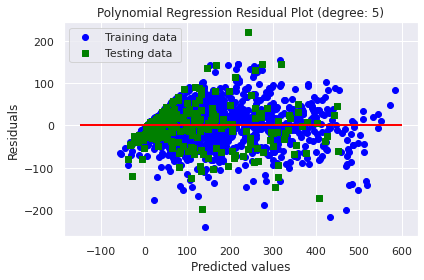

Polynomial Degree: 5
MSE train: 1569.32, test: 2980.77
R^2 train: 0.90, test: 0.82


In [430]:
# Residual Plot
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Testing data')
plt.title('Polynomial Regression Residual Plot (degree: %d)' % poly_degree)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-150, xmax=600, lw=2, color='red')
plt.tight_layout()
plt.savefig('./fig-polynomial-regression.png', dpi=300)
plt.show()

print('Polynomial Degree: %d' % poly_degree)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % 
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

# Random Forest Regression

In [431]:
# Random Forest Regression
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

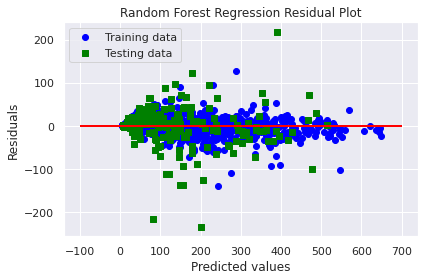

MSE train: 237.89, test 2085.57
R^2 train: 0.98, test 0.87


In [432]:
# Residual Plot
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Testing data')
plt.title('Random Forest Regression Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-100, xmax=700, lw=2, color='red')
plt.tight_layout()
plt.savefig('./fig-forest-regression.png', dpi=300)
plt.show()

print('MSE train: %.2f, test %.2f' % 
      (mean_squared_error(y_train, y_train_pred), 
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test %.2f' % 
      (r2_score(y_train, y_train_pred), 
       r2_score(y_test, y_test_pred)))